# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Load the data

In [2]:
advert=pd.read_csv("Advertising.csv")
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert.drop(["Unnamed: 0"],axis=1,inplace=True)
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


# Relationship between Features and Target

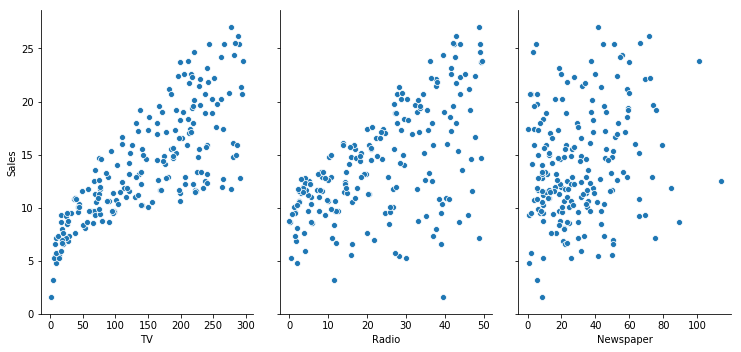

In [5]:
sns.pairplot(advert,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=5,aspect=0.7)

# Multiple Linear Regression - Estimating Coefficients

In [6]:
from sklearn.linear_model import LinearRegression

x=advert[['TV','Radio','Newspaper']]
y=advert.Sales

mlr1=LinearRegression()
mlr1.fit(x,y)

print("Intercept: ",mlr1.intercept_)
print("Coefficient: ",mlr1.coef_)

Intercept:  2.9388893694594067
Coefficient:  [ 0.04576465  0.18853002 -0.00103749]


In [7]:
list(zip(['Tv','Radio','Newspaper'],mlr1.coef_))

[('Tv', 0.04576464545539761),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

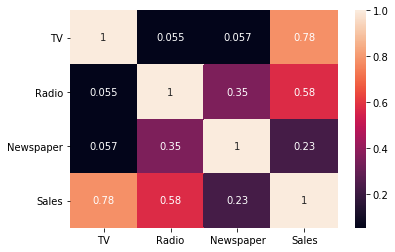

In [8]:
sns.heatmap(advert.corr(),annot=True)

# Feature Selection 

In [9]:
from sklearn.metrics import r2_score

mlr2=LinearRegression().fit(x[['TV','Radio']],y)
mlr2_pred=mlr2.predict(x[['TV','Radio']])

print("R^2: ",r2_score(y,mlr2_pred))

R^2:  0.8971942610828956


In [10]:
mlr3=LinearRegression().fit(x[['TV','Radio','Newspaper']],y)
mlr3_pred=mlr3.predict(x[['TV','Radio','Newspaper']])

print("R^2: ",r2_score(y,mlr3_pred))

R^2:  0.8972106381789522


# Model evaluation using Train/Test Split and Metrics

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x=advert[['TV','Radio','Newspaper']]
y=advert.Sales

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

mlr4=LinearRegression().fit(x_train,y_train)
mlr4_pred=mlr4.predict(x_test)

print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,mlr4_pred)))
print("R^2: ",r2_score(y_test,mlr4_pred))

Root Mean Squared Error:  1.4046514230328955
R^2:  0.9156213613792232


In [12]:
x=advert[['TV','Radio']]
y=advert.Sales

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

mlr5=LinearRegression().fit(x_train,y_train)
mlr5_pred=mlr5.predict(x_test)

print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,mlr5_pred)))
print("R^2: ",r2_score(y_test,mlr5_pred))

Root Mean Squared Error:  1.3879034699382888
R^2:  0.9176214942248908


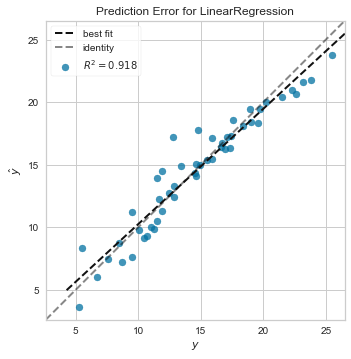

In [19]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer=PredictionError(mlr5).fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

# Interaction Effect (Synergy)

In [20]:
advert['Interaction']=advert['TV']*advert['Radio']

x=advert[['TV','Radio','Interaction']]
y=advert.Sales

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

mlr6=LinearRegression().fit(x_train,y_train)
mlr6_pred=mlr6.predict(x_test)

print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,mlr6_pred)))
print("R^2: ",r2_score(y_test,mlr6_pred))

Root Mean Squared Error:  0.7011871137164326
R^2:  0.9789736814681261


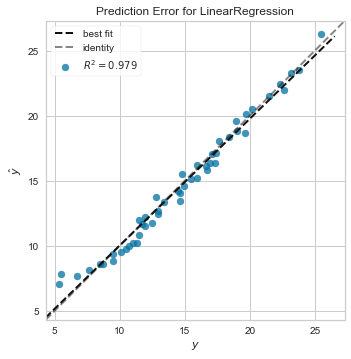

In [21]:
visualizer=PredictionError(mlr6).fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()